In [14]:
import os
import numpy as np
import nibabel as nib #Read / write access to some common neuroimaging file formats
import matplotlib.pyplot as plt

In [15]:
brain_dir = './OASIS3_brains/'
brain_files = [f for f in os.listdir(brain_dir)]
print("Number of brains: ", len(brain_files))

Number of brains:  557


In [16]:
one_brain = np.array(nib.load( os.path.join(brain_dir, brain_files[1]) ).get_data())
shape = one_brain.shape
print(one_brain.dtype, one_brain.itemsize)
print(one_brain.size)
print("Brain image shape: ", shape) 

float32 4
7221032
Brain image shape:  (182, 218, 182)


In [17]:
dataset_size = len(brain_files)*one_brain.size*one_brain.itemsize
print("Size =", np.round(dataset_size/1024**3, 2), "GB")

Size = 14.98 GB


In [18]:
average_brain = np.zeros_like(one_brain)
for brain in brain_files:
    average_brain = average_brain + np.array(nib.load(os.path.join(brain_dir, brain)).get_data())
average_brain = average_brain/len(brain_files)

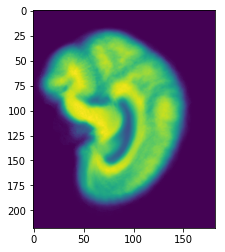

In [19]:
dimension = 0
s = 100
plt.imshow(np.take(average_brain, s, dimension))
plt.show()

['sub-OAS30748_ses-d0219_run-02_T1w.nii.gz', 'sub-OAS30760_ses-d3837_run-01_T1w.nii.gz', 'sub-OAS30734_ses-d0097_run-02_T1w.nii.gz', 'sub-OAS30967_ses-d0854_run-02_T1w.nii.gz', 'sub-OAS30314_ses-d7814_run-01_T1w.nii.gz', 'sub-OAS30778_ses-d0510_run-01_T1w.nii.gz', 'sub-OAS30785_ses-d0096_T1w.nii.gz', 'sub-OAS30517_ses-d0072_run-01_T1w.nii.gz', 'sub-OAS30534_ses-d1174_run-01_T1w.nii.gz', 'sub-OAS30545_ses-d0028_run-01_T1w.nii.gz', 'sub-OAS30549_ses-d1244_run-02_T1w.nii.gz', 'sub-OAS30768_ses-d2337_T1w.nii.gz', 'sub-OAS30723_ses-d2568_run-02_T1w.nii.gz', 'sub-OAS30559_ses-d2422_T1w.nii.gz', 'sub-OAS30775_ses-d0329_run-02_T1w.nii.gz', 'sub-OAS30781_ses-d0971_T1w.nii.gz', 'sub-OAS30521_ses-d0979_run-02_T1w.nii.gz', 'sub-OAS30719_ses-d1166_run-02_T1w.nii.gz', 'sub-OAS30316_ses-d0018_T1w.nii.gz', 'sub-OAS30725_ses-d1182_run-01_T1w.nii.gz']


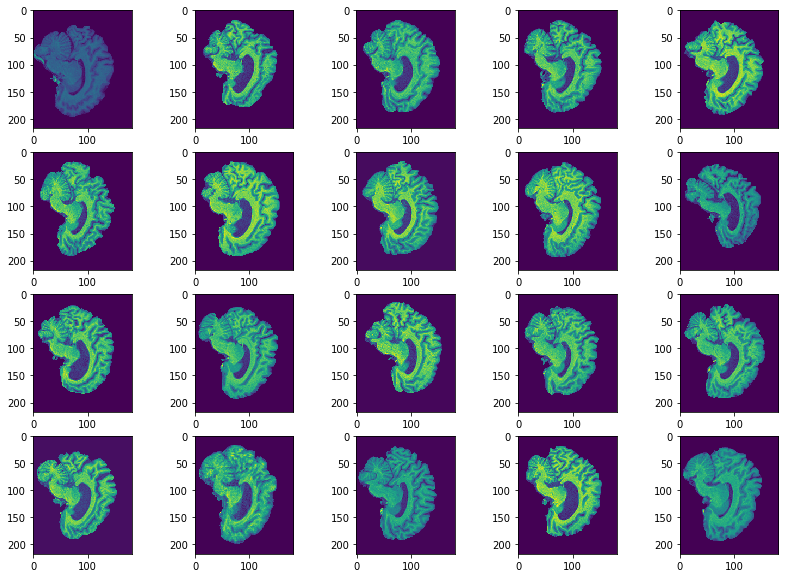

In [20]:
# Load a few brains
num_few = 20
print(brain_files[:num_few])
np_brains = np.array([nib.load( os.path.join(brain_dir, brain) ).get_data() for brain in brain_files[:num_few]])

dimension = 0
s = 100
plt.figure(figsize=(14, 10))
for i in range(1, 5*4+1):
    plt.subplot(4,5,i)
    plt.imshow(np.take(np_brains[i-1], s, dimension))
plt.show()

In [21]:
os.path.join(brain_dir, brain_files[1])

'./OASIS3_brains/sub-OAS30760_ses-d3837_run-01_T1w.nii.gz'

In [22]:
import pandas as pd
df = pd.read_csv('OASIS_orig_path_labels.csv')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,subject,file,path,sex
0,0,0,OAS30785,sub-OAS30785_ses-d0096_T1w.nii.gz,./OASIS3/OAS30785_MR_d0096/anat2/NIFTI/sub-OAS...,m
1,1,1,OAS30514,sub-OAS30514_ses-d1526_T1w.nii.gz,./OASIS3/OAS30514_MR_d1526/anat2/NIFTI/sub-OAS...,f
2,2,2,OAS30313,sub-OAS30313_ses-d0048_T1w.nii.gz,./OASIS3/OAS30313_MR_d0048/anat2/NIFTI/sub-OAS...,m
3,3,3,OAS30714,sub-OAS30714_ses-d0444_run-02_T1w.nii.gz,./OASIS3/OAS30714_MR_d0444/anat3/NIFTI/sub-OAS...,f
4,4,4,OAS30714,sub-OAS30714_ses-d0444_run-01_T1w.nii.gz,./OASIS3/OAS30714_MR_d0444/anat2/NIFTI/sub-OAS...,f


In [59]:
subject =    [df.loc[df['file'] == brain_file].subject.iloc[0] for brain_file in brain_files]
file =       [os.path.join(brain_dir, brain_file) for brain_file in brain_files]
age_labels = -np.ones(len(sex_labels)) # all missing
sex_labels = [df.loc[df['file'] == brain_file].sex.iloc[0] for brain_file in brain_files]
print(len(subject), len(file), len(age_labels), len(sex_labels))

557 557 557 557


In [63]:
d = {"subject": subject, "file":file, "age": age_labels, "sex": sex_labels}
new_df = pd.DataFrame(data=d)
new_df.head(5)

,subject,file,age,sex
0,OAS30748,./OASIS3_brains/sub-OAS30748_ses-d0219_run-02_...,-1.0,f
1,OAS30760,./OASIS3_brains/sub-OAS30760_ses-d3837_run-01_...,-1.0,m
2,OAS30734,./OASIS3_brains/sub-OAS30734_ses-d0097_run-02_...,-1.0,f
3,OAS30967,./OASIS3_brains/sub-OAS30967_ses-d0854_run-02_...,-1.0,f
4,OAS30314,./OASIS3_brains/sub-OAS30314_ses-d7814_run-01_...,-1.0,f


In [64]:
new_df.to_csv("OASIS3_labels.csv", sep=',', index=False)